In [1]:
import glob
import pandas as pd
cat = glob.glob("train/cat.*.jpg")
dog = glob.glob("train/dog.*.jpg")
data = pd.DataFrame({
    "path": cat + dog,
    "ans":[0] * len(cat) + [1] * len(dog)
})
data

,path,ans
0,train\cat.0.jpg,0
1,train\cat.1.jpg,0
2,train\cat.10.jpg,0
3,train\cat.100.jpg,0
4,train\cat.1000.jpg,0
...,...,...
24995,train\dog.9995.jpg,1
24996,train\dog.9996.jpg,1
24997,train\dog.9997.jpg,1
24998,train\dog.9998.jpg,1


In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary

Using TensorFlow backend.
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1

E:\PyETL\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\PyETL\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\PyETL\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\PyETL\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or 

<bound method Network.summary of <keras.engine.training.Model object at 0x000001891A60A860>>

In [3]:
def test():
    return print
test()("hello")

hello


In [4]:
vgg.layers

In [5]:
from keras.layers import Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
# Dense(256, activation="relu") -> 函式(e.g. return print)
# tensor = func(tensor)
# vgg.output
for l in vgg.layers:
    l.trainable = False
# 1024 trainable 1024 nontrainable
x = BatchNormalization()(vgg.output)

x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
# Model(input=tensor, outputs=tensor)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

In [6]:
# trainable 一定要在compile前就設定
cnn.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])


In [7]:
from sklearn.model_selection import train_test_split
# !!! 進入訓練階段以後, list(X), dataframe(X) np.array(O)
import numpy as np
from keras.utils.np_utils import to_categorical
x = np.array(data["path"])
y = np.array(data["ans"])
y_cat = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y_cat, 
                                                    test_size=0.1)

In [8]:
# Pillow(PIL)
# 處理一張照片給你看
from keras.preprocessing.image import load_img
# 一定使用那個模型的preprocess
from keras.applications.vgg16 import preprocess_input
img = load_img(x_train[0], target_size=(224, 224)).convert("RGB")
img_np = np.array(img)
preprocess_input(img_np)

array([[[-18.939003 ,  41.221    ,  12.32     ],
        [-16.939003 ,  22.221    ,  -2.6800003],
        [ 12.060997 ,  28.221    ,   6.3199997],
        ...,
        [-12.939003 ,   6.2210007, -24.68     ],
        [ -8.939003 ,  10.221001 , -21.68     ],
        [-31.939003 , -12.778999 , -44.68     ]],

       [[ -6.939003 ,  57.221    ,  23.32     ],
        [ -4.939003 ,  38.221    ,   8.32     ],
        [ 27.060997 ,  44.221    ,  18.32     ],
        ...,
        [-30.939003 ,  -7.7789993, -38.68     ],
        [-18.939003 ,  -2.7789993, -32.68     ],
        [ 29.060997 ,  43.221    ,  16.32     ]],

       [[-10.939003 ,  56.221    ,  20.32     ],
        [  6.060997 ,  51.221    ,  19.32     ],
        [ 27.060997 ,  47.221    ,  19.32     ],
        ...,
        [-42.939003 , -13.778999 , -45.68     ],
        [ 40.060997 ,  54.221    ,  27.32     ],
        [110.061    , 119.221    ,  94.32     ]],

       ...,

       [[-66.939    , -20.779    , -65.68     ],
        [-7

In [9]:
# x:圖片, y:答案, batch:取幾個
# 回傳 (原始圖片[batch], 處理圖片[batch], 答案[batch])
def get_data(x, y, batch):
    idx = np.random.randint(0, x.shape[0], batch)
    # 原本未處理的圖片
    oriimgs = []
    # Preprocess過後的圖片
    preimgs = []
    for p in x[idx]:
        img = load_img(p, target_size=(224, 224)).convert("RGB")
        img_np = np.array(img)
        oriimgs.append(img_np)
        img_pre = preprocess_input(img_np) 
        preimgs.append(img_pre)

    oriimgs = np.array(oriimgs)
    preimgs = np.array(preimgs)
    ans = y[idx]
    return (oriimgs, preimgs, ans)

In [10]:
# 訓練: train_on_batch
# 驗證: test_on_batch
for i in range(10):
    print("次數:", i + 1)
    batch = 100
    train = get_data(x_train, y_train, batch)
    train_result = cnn.train_on_batch(train[1], train[2])
    print("[Train]:", train_result)
    # 如果可以把驗證的圖片設多一點
    test_batch = 20
    test = get_data(x_test, y_test, test_batch)
    test_result = cnn.test_on_batch(test[1], test[2])
    print("[Validate]:", test_result)
    print("-" * 30)

次數: 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[Train]: [1.0945076, 0.53]
[Validate]: [0.6447374, 0.9]
------------------------------
次數: 2
[Train]: [0.5923404, 0.88]
[Validate]: [1.928312, 0.7]
------------------------------
次數: 3
[Train]: [1.6328671, 0.82]
[Validate]: [0.075789124, 0.9]
------------------------------
次數: 4
[Train]: [0.6577084, 0.89]
[Validate]: [3.2680779, 0.75]
------------------------------
次數: 5
[Train]: [0.61241084, 0.92]
[Validate]: [1.2119563, 0.85]
------------------------------
次數: 6
[Train]: [0.8514292, 0.89]
[Validate]: [1.9304659, 0.75]
------------------------------
次數: 7
[Train]: [1.2402817, 0.85]
[Validate]: [0.69336116, 0.95]
------------------------------
次數: 8
[Train]: [0.30619255, 0.96]
[Validate]: [1.3863496, 0.9]
------------------------------
次數: 9
[Train]: [0.6981581, 0.94]
[Validate]: [1.3113022e-07, 1.0]
------------------------------
次數: 10
[Train]: [0.8375111, 0.91]
[Validate]: [0.00211150

In [11]:
# 秀一下問題給你看
# 問題1: 怎麼全部同一個預測
# 問題2: 機率不該看到1 & 0
cnn.predict(test[1])

array([[0.0000000e+00, 1.0000000e+00],
       [5.2642972e-34, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 7.5628667e-38],
       [4.1348673e-02, 9.5865136e-01],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 7.8493011e-23],
       [3.2493379e-23, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 6.1746434e-35],
       [5.7613547e-27, 1.0000000e+00],
       [1.8529148e-23, 1.0000000e+00],
       [1.8848365e-14, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.5929150e-13],
       [1.0000000e+00, 2.7980636e-36],
       [1.0000000e+00, 7.3486698e-28],
       [1.0000000e+00, 3.4458133e-37],
       [1.8843584e-29, 1.0000000e+00]], dtype=float32)

In [12]:
final_batch = 200
final = get_data(x_test, y_test, final_batch)

pre = cnn.predict(final[1])
cnn.evaluate(final[1], final[2])

200/200 [==============================] - 24s 118ms/step


[0.6564542820677162, 0.935]

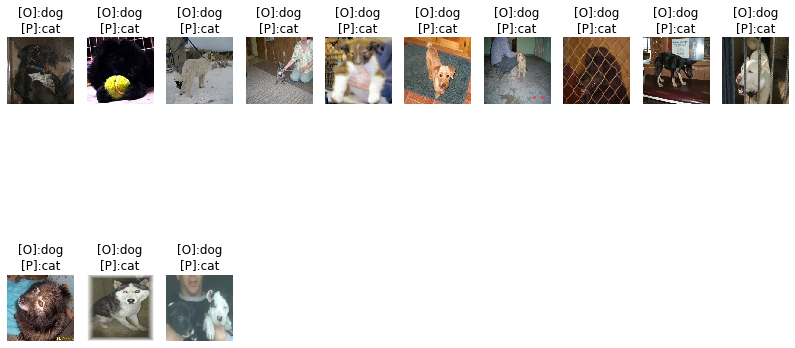

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model沒有predict_classes
# 所以我們要用argmax() 取得最大值的索引
# pre.argmax(axis=1)
idx = np.nonzero(pre.argmax(axis=1) != final[2].argmax(axis=1))[0]
# 預測錯誤的圖片
false_img = final[0][idx]
# 預測錯誤圖片的正確答案
false_answer = final[2].argmax(axis=1)[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre.argmax(axis=1)[idx]

trans = ["cat", "dog"]
width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 8))
for i,img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]:" + trans[false_answer[i]] + "\n[P]:" + trans[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)